# TP1: Introduction to PyTorch and Neural Networks

The goal of this TP is to introduce you to PyTorch and Neural Networks. We will start by learning the basics of PyTorch, then we will implement a simple neural network to classify the MNIST dataset. First, we will introduce the data loader and the dataset, then we will implement the neural network and train it. Finally, we will evaluate the model and visualize the results.

The objective of this TP is to get you familiar with PyTorch and the basic concepts of:
- Neural Networks
- Data Loaders
- Stochastic Gradient Descent
- Backpropagation
- Training and Testing


The TP is divided into the following sections:
1. PyTorch Basics
- Tensors
- Reshape
- Operations
2. Data Loader and Dataset
- Pre-processing
- Mini-batch
- Data Loader
3. Neural Network
- Initialization
- Forward
4. Training
- Loss
- Backward
- Optimization
5. Evaluation
- Accuracy
- Confusion Matrix

This TP is not graded, but it is important to understand the concepts and be able to implement them. The TP consists of code snippets that you need to complete and question to answer. You can run the code snippets by pressing `Shift + Enter`. You can also modify the code snippets and experiment with different configurations.


## 1. PyTorch Basics

In this section, we will learn the basics of PyTorch. We will start by importing the necessary libraries and then we will learn about Tensors, Reshape, and the different operations that can be performed on Tensors.

First, a Tensor is a multi-dimensional matrix containing elements of a single data type. Tensors are similar to NumPy arrays, but they can be used on a GPU to accelerate computing. In PyTorch, Tensors are used to encode the inputs, the latent variables, and the outputs of a neural network.

In [1]:
import torch  # PyTorch
import imageio  # Imageio
import numpy as np  # NumPy
import matplotlib.pyplot as plt  # Matplotlib

In [51]:
# Download an image
!wget https://lamsade.dauphine.fr/~averine/DL3AIISO/dauphine.png

--2025-09-30 08:52:36--  https://lamsade.dauphine.fr/~averine/DL3AIISO/dauphine.png
Résolution de lamsade.dauphine.fr (lamsade.dauphine.fr)… 193.48.71.250
Connexion à lamsade.dauphine.fr (lamsade.dauphine.fr)|193.48.71.250|:443… connecté.
requête HTTP transmise, en attente de la réponse… 302 Found
Emplacement : https://www.lamsade.dauphine.fr/~averine/DL3AIISO/dauphine.png [suivant]
--2025-09-30 08:52:36--  https://www.lamsade.dauphine.fr/~averine/DL3AIISO/dauphine.png
Résolution de www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)… 193.48.71.250
Connexion à www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)|193.48.71.250|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 1715 (1,7K) [image/png]
Sauvegarde en : « dauphine.png.1 »

dauphine.png.1      100%[===================>]   1,67K  --.-KB/s    ds 0s      

2025-09-30 08:52:36 (121 MB/s) — « dauphine.png.1 » sauvegardé [1715/1715]



### From Numpy to PyTorch

In [3]:
image_png = imageio.v3.imread("dauphine.png")
print("Image class is loaded as a: ", type(image_png))

Image class is loaded as a:  <class 'numpy.ndarray'>


<font color='red'>**Questions 1.1 What size is the array? What do the dimensions represent?**</font>


Your Answer:


Correction: (148, 149, 3), the dimensions represent the height, width, and number of channels of the image.

Let's now focus on the different operations that can be performed on Tensors. We will start by creating a Tensor and then we will perform some basic operations such as addition, subtraction, multiplication, and division.

<font color='blue'>TODO:</font> Use the function [torch.Tensor](https://pytorch.org/docs/stable/generated/torch.tensor.html#torch.tensor) to convert a list to a Torch tensor. You can also use the function [torch.from_numpy](https://pytorch.org/docs/stable/generated/torch.from_numpy.html#torch.from_numpy).

In [4]:
image_tensor = torch.Tensor(image_png)
image_tensor = torch.from_numpy(image_png)
print("Image tensor is loaded as a: ", type(image_tensor))

Image tensor is loaded as a:  <class 'torch.Tensor'>


<font color='blue'>TODO:</font> Use the method [.size()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.size) to get the size of the tensor. You can also use the attribute [.shape](https://pytorch.org/docs/stable/generated/torch.Tensor.shape.html).

In [5]:
print("Image tensor shape is: ", image_tensor.shape)
print("Image tensor shape is: ", image_tensor.size())

Image tensor shape is:  torch.Size([148, 149, 3])
Image tensor shape is:  torch.Size([148, 149, 3])


<font color='blue'> TODO:</font> The dimension for RGB is typically the first one in Torch. Use the function ['torch.permute'](https://pytorch.org/docs/stable/generated/torch.permute.html#torch.permute) to permute the dimensions of the tensor. You can also use the method [.permute](https://pytorch.org/docs/stable/generated/torch.Tensor.permute.html#torch.Tensor.permute) of the tensor.

In [6]:
image_tensor = image_tensor.permute(2, 0, 1)
print("Image tensor shape is: ", image_tensor.shape)

Image tensor shape is:  torch.Size([3, 148, 149])


<font color='blue'> TODO:</font> Use the method ['.numpy()'](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.numpy) to convert the tensor to a numpy array. and plot the image using the function ['plt.imshow'](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

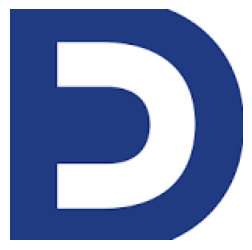

In [7]:
plt.figure(figsize=(3, 3))
plt.imshow(image_tensor.permute(1, 2, 0).numpy())
plt.axis("off")
plt.show()

<font color='blue'> TODO: </font> Use the attribute [.dtype](https://pytorch.org/docs/stable/tensor_attributes.html#torch.dtype) to get the data type of the tensor.

In [8]:
print("Image tensor type is: ", image_tensor.dtype)

Image tensor type is:  torch.uint8


<font color='blue'> TODO: </font> Use the method [.min()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.min) and [.max()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.max) to get the minimum and maximum values of the tensor.

In [9]:
print("Image tensor min value is: ", image_tensor.min())
print("Image tensor max value is: ", image_tensor.max())

Image tensor min value is:  tensor(0, dtype=torch.uint8)
Image tensor max value is:  tensor(255, dtype=torch.uint8)


<font color='red'>**Questions 1.2 What happens if we use [.mean()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.mean) on the tensor?**</font>

Your Answer:

Correction: The function returns an error. We need to change the type of the tensor to float before using the function.

<font color='blue'> TODO: </font> Use the method [.float()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.float) to change the type of the tensor to float. You can also change to other types such as double using the method [.double()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.double) or [torch.float64()](https://pytorch.org/docs/stable/tensors.html#torch.float64).

In [10]:
image_tensor = image_tensor.float()
print("Image tensor type is: ", image_tensor.dtype)

Image tensor type is:  torch.float32


<font color='blue'> TODO: </font> Use the method [.mean()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.mean) and [.std()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.std) to get the mean and standard deviation of the tensor. Also print the minimum and maximum values of the tensor.

In [11]:
print("Image tensor min value is: ", image_tensor.min())
print("Image tensor max value is: ", image_tensor.max())
print("Image tensor mean value is: ", image_tensor.mean())
print("Image tensor std value is: ", image_tensor.std())

Image tensor min value is:  tensor(0.)
Image tensor max value is:  tensor(255.)
Image tensor mean value is:  tensor(134.1239)
Image tensor std value is:  tensor(91.1991)


<font color='blue'> TODO: </font> Use the method [.item()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.item) to get the value of a tensor with a single element. Print the mean value as a float and not a tensor.

In [12]:
print("Image tensor mean value is: ", image_tensor.mean().item())

Image tensor mean value is:  134.12388610839844


<font color='blue'> TODO: </font> Use the method [.mean()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.mean) to get the mean values of the tensor dimension 0. You can also use the function [torch.mean()](https://pytorch.org/docs/stable/generated/torch.mean.html#torch.mean) of the torch module.

In [ ]:
print("Image tensor mean value per channel is: ", image_tensor.mean(dim=(1, 2)))
print("Image tensor mean value per channel is: ", torch.mean(image_tensor, dim=(1, 2)))

Image tensor mean value per channel is:  tensor([106.4815, 123.8400, 172.0502])
Image tensor mean value per channel is:  tensor([106.4815, 123.8400, 172.0502])


<font color='blue'> TODO: </font> Use the method [.view()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view) to reshape the tensor as a 2D tensor with 3 columns and 148*149 rows. You can also use the method [.reshape()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.reshape) to reshape the tensor.

In [52]:
image_tensor_reshaped = image_tensor.view(3, 148 * 149)
image_tensor_reshaped = image_tensor.reshape(3, 148 * 149)
print("Image tensor reshaped shape is: ", image_tensor_reshaped.shape)

Image tensor reshaped shape is:  torch.Size([3, 22052])


<font color='blue'> TODO: </font> Use the method [.reshape()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.reshape) to reshape the tensor as a 1D tensor. You can use the argement [-1] to infer the number of elements in the tensor. You can also use the method [.flatten()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.flatten) to flatten the tensor.

In [15]:
image_tensor_flatten = image_tensor.flatten()
print("Image tensor flatten shape is: ", image_tensor_flatten.shape)
image_tensor_flatten = image_tensor.reshape(-1)
print("Image tensor flatten shape is: ", image_tensor_flatten.shape)

Image tensor flatten shape is:  torch.Size([66156])
Image tensor flatten shape is:  torch.Size([66156])


### Random Tensors 
We will now use random tensors to introduce the basic operations. First, in Pytorch, we typically work with float tensors between 0 and 1. Instead of using the method [float()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.float) to convert the tensor to float, we can directly divide the tensor by 255.0:

In [53]:
image_tensor = torch.Tensor(image_png).permute(2, 0, 1) / 255.0

<font color='blue'> TODO:</font> Use the function [torch.randn](https://pytorch.org/docs/stable/generated/torch.randn.html#torch.randn) to create a tensor with the same size as the tensor 'image_tensor'. You can also use the function [torch.randn_like](https://pytorch.org/docs/stable/generated/torch.randn_like.html#torch.randn_like) to create a tensor with the same size as another tensor.

In [54]:
random_tensor = torch.randn(3, 148, 149)
print("Random tensor shape is: ", random_tensor.shape)
random_vector = torch.randn_like(image_tensor)
print("Random vector shape is: ", random_vector.shape)

Random tensor shape is:  torch.Size([3, 148, 149])
Random vector shape is:  torch.Size([3, 148, 149])


<font color='blue'> TODO:</font> Use the function [torch.add()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.add) to add the tensor to 'image_tensor'. You can also use the operator '+' or the method [.add()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.add) to add the tensors.

In [55]:
image_tensor_random = image_tensor + random_vector

<font color='blue'> TODO:</font> Use the function [torch.clamp()](https://pytorch.org/docs/stable/generated/torch.clamp.html#torch.clamp) to make sure the values of the tensor are between 0 and 1. You can also use the method [.clamp()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.clamp) or the function [torch.clip()](https://pytorch.org/docs/stable/generated/torch.clip.html#torch.clip).  

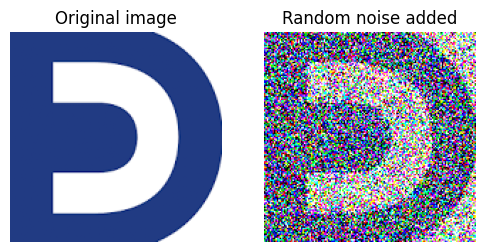

In [56]:
image_tensor_random_clamped = torch.clamp(image_tensor_random, 0, 1)

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(image_tensor.permute(1, 2, 0).numpy())
plt.axis("off")
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.imshow(image_tensor_random_clamped.permute(1, 2, 0).numpy())
plt.axis("off")
plt.title("Random noise added")
plt.show()

<font color='blue'> TODO:</font> Use the function [torch.rand](https://pytorch.org/docs/stable/generated/torch.rand.html#torch.rand) to create a random tensor with the same size as the tensor 'image_tensor'. This random tensor will have values between 0 and 1. You can also use the function [torch.rand_like](https://pytorch.org/docs/stable/generated/torch.rand_like.html#torch.rand_like) to create a random tensor with the same size as another tensor.

In [60]:
random_vector = torch.rand(image_tensor.shape)
print("Random vector shape is: ", random_vector.shape)
random_vector = torch.rand_like(image_tensor) * 0.2
print("Random vector shape is: ", random_vector.shape)

Random vector shape is:  torch.Size([3, 148, 149])
Random vector shape is:  torch.Size([3, 148, 149])


<font color='blue'> TODO:</font> Use the function [torch.mul()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.mul) to multiply the tensor by 'image_tensor'. You can also use the operator '*' or the method [.mul()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.mul) to multiply the tensors.

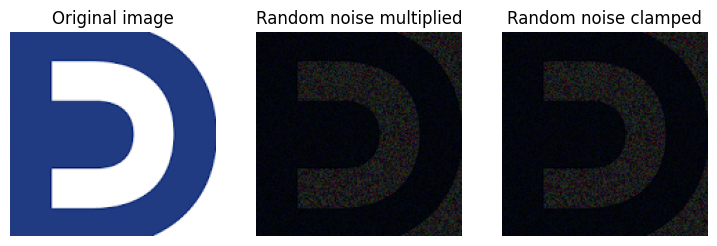

In [61]:
image_tensor_random = image_tensor * random_vector


image_tensor_random_clamped = torch.clamp(image_tensor_random, 0, 1)
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(image_tensor.permute(1, 2, 0).numpy())
plt.axis("off")
plt.title("Original image")
plt.subplot(1, 3, 2)
plt.imshow(image_tensor_random.permute(1, 2, 0).numpy())
plt.axis("off")
plt.title("Random noise multiplied")
plt.subplot(1, 3, 3)
plt.imshow(image_tensor_random_clamped.permute(1, 2, 0).numpy())
plt.axis("off")
plt.title("Random noise clamped")
plt.show()

<font color='blue'> TODO:</font> Use the function [torch.sub()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.sub) and [torch.div()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.div) to normalize the tensor between 0 and 1. You can also use the operators '-' and '/'. NB: to normalize the tensor, you need to subtract the minimum value and divide by the maximum value minus the minimum value.

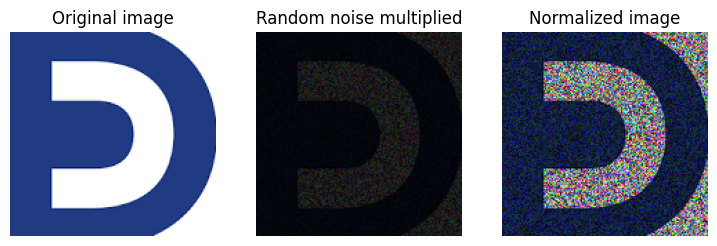

In [63]:
image_tensor_random_normalized = (image_tensor_random - image_tensor_random.min()) / (
    image_tensor_random.max() - image_tensor_random.min()
)

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(image_tensor.permute(1, 2, 0).numpy())
plt.axis("off")
plt.title("Original image")
plt.subplot(1, 3, 2)
plt.imshow(image_tensor_random_clamped.permute(1, 2, 0).numpy())
plt.axis("off")
plt.title("Random noise multiplied")
plt.subplot(1, 3, 3)
plt.imshow(image_tensor_random_normalized.permute(1, 2, 0).numpy())
plt.axis("off")
plt.title("Normalized image")
plt.show()

### Batch Operations
In Deep Learning, we typically work with mini-batches of data. We will now introduce the concept of mini-batch and perform operations on mini-batches. While in a classical example batches are composed of different samples, in this example we will use the same sample with different random noise to simulate a mini-batch. We will use different methods to build the mini-batch and perform operations on the mini-batch.

<font color='blue'> TODO:</font> Use the function [torch.repeat()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.repeat) to repeat the tensor 'image_tensor' 4 times along the first dimension. You can also use the method [.repeat()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.repeat) to repeat the tensor. Then add some random normal noise to the tensor.

In [65]:
batch_tensor = image_tensor.repeat(4, 1, 1, 1)
batch_tensor += torch.randn_like(batch_tensor)
batch_tensor = torch.clamp(batch_tensor, 0, 1)

print("Batch tensor shape is: ", batch_tensor.shape)
print(
    "Any identical sample in the batch? ",
    torch.all(batch_tensor[0] == batch_tensor[1]).item(),
)

Batch tensor shape is:  torch.Size([4, 3, 148, 149])
Any identical sample in the batch?  False


<font color='blue'> TODO:</font> Use the function [torch.cat()](https://pytorch.org/docs/stable/torch.html#torch.cat) to concatenate the tensor 'image_tensor' with the tensor 'image_tensor' 4 times. You can also use the method [.cat()](https://pytorch.org/docs/stable/torch.html#torch.Tensor.cat) to concatenate the tensors. Then add some random normal noise to the tensor.

In [ ]:
image_tensor_copy = image_tensor.clone().view(1, 3, 148, 149)
batch_tensor = torch.cat(
    [image_tensor_copy, image_tensor_copy, image_tensor_copy, image_tensor_copy], dim=0
)
batch_tensor += torch.randn_like(batch_tensor)

print("Batch tensor shape is: ", batch_tensor.shape)
print(
    "Any identical sample in the batch? ",
    torch.all(batch_tensor[0] == batch_tensor[1]).item(),
)

Batch tensor shape is:  torch.Size([4, 3, 148, 149])
Any identical sample in the batch?  False


<font color='blue'> TODO:</font> Use the function [torch.stack()](https://pytorch.org/docs/stable/generated/torch.stack.html#torch.stack) to stack the tensor 'image_tensor' with the tensor 'image_tensor' 4 times. Then add some random normal noise to the tensor.


In [25]:
batch_tensor = torch.stack([image_tensor, image_tensor, image_tensor, image_tensor])
batch_tensor += torch.randn_like(batch_tensor)
print("Batch tensor shape is: ", batch_tensor.shape)
print(
    "Any identical sample in the batch? ",
    torch.all(batch_tensor[0] == batch_tensor[1]).item(),
)

Batch tensor shape is:  torch.Size([4, 3, 148, 149])
Any identical sample in the batch?  False


In the three previous examples, we have created a mini-batch by repeating the same sample with different random noise. In practice, we would have different samples in the mini-batch of size [4, 3, 148, 149]. 

<font color='blue'> TODO:</font> Use the function [torch.mean()](https://pytorch.org/docs/stable/generated/torch.mean.html#torch.mean) to compute the mean of the mini-batch. Then print the mean value for each samples. To do so, use the argument *dim* of the function to compute the mean along the first dimension. 

In [26]:
print("Image tensor mean value is: ", image_tensor.mean())
print("Batch tensor mean value per sample is: ", batch_tensor.mean(dim=(1, 2, 3)))

Image tensor mean value is:  tensor(0.5249)
Batch tensor mean value per sample is:  tensor([0.5290, 0.5271, 0.5255, 0.5207])


<font color='blue'> TODO:</font> Redefine a batch composed of 4 samples with the sample (without noise). Then create a random uniform tensor of size [4, 3] and add it to the batch. Image should received the same value for all pixels of the same channel. You can use the function [torch.unsqueeze()](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) to add a dimension to the tensor or add the vector as *random_vector[:, :, None, None]* or the method [.view()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view) to reshape the tensor.

In [68]:
random_tensor = torch.rand(4, 3)
print("Random tensor shape is: ", random_tensor.shape)
print("Random tensor shape is: ", random_tensor.unsqueeze(2).shape)
print("Random tensor shape is: ", random_tensor.unsqueeze(2).unsqueeze(3).shape)

Random tensor shape is:  torch.Size([4, 3])
Random tensor shape is:  torch.Size([4, 3, 1])
Random tensor shape is:  torch.Size([4, 3, 1, 1])


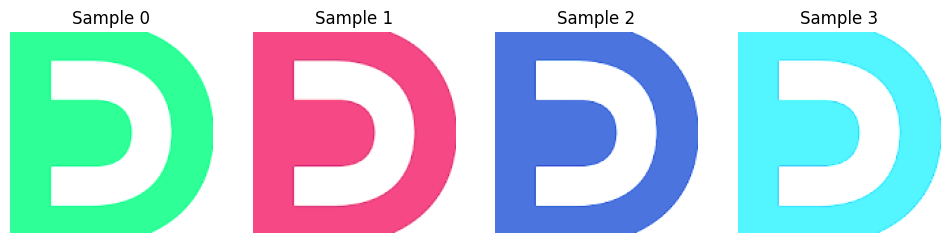

In [ ]:
batch_tensor = torch.stack([image_tensor, image_tensor, image_tensor, image_tensor])
random_vector = torch.rand(4, 3)
# batch_tensor += random_vector.view(4, 3, 1, 1)
# batch_tensor += random_vector.unsqueeze(2).unsqueeze(2)
batch_tensor += random_vector[:, :, None, None]

batch_tensor = torch.clamp(batch_tensor, 0, 1)
plt.figure(figsize=(12, 3))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(batch_tensor[i].permute(1, 2, 0).numpy())
    plt.axis("off")
    plt.title("Sample %d" % i)
plt.show()

## 2. Data Loader and Dataset

In this section, we will introduce the data loader and the dataset. We will start by loading the MNIST dataset and then we will pre-process the data. We will also introduce the concept of mini-batch and the data loader.

In [28]:
# Load MNIST dataset
from torchvision import datasets, transforms

/home/lamsade/averine/miniconda3/envs/edm/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/lamsade/averine/miniconda3/envs/edm/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


To do so, we use the datasets and dataloaders from the torch module. The dataset is used to load the data and the data loader is used to create mini-batches of the data. The data loader is an iterable that returns a mini-batch of data at each iteration. The dataset consists of two parts: training samples and testing samples. The training samples are used to train the model and the testing samples are used to evaluate the model. The datasets classes take transorms as input to pre-process the data. The transforms are used to normalize the data, convert the data to a tensor, or augment the data.

The most simple and mandatory transform is [ToTensor()](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor) which converts the data to a tensor. The data is typically loaded as a PIL image and then converted to a tensor. The data is also normalized to have values between 0 and 1. The MNIST dataset is composed of images of size 28x28 pixels and the images are grayscale. The images are loaded as PIL images and then converted to tensors. The images are also normalized to have values between 0 and 1.

In [29]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root=".", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root=".", train=False, download=True, transform=transform)

<font color='blue'> TODO:</font> Use the python function *len()* to get the length of the training and testing datasets.  You can also directly print the dataset or look at the shape of the tensor train_dataset.data or train_dataset.targets.

In [30]:
print("Train dataset size is: ", len(train_dataset))
print("Test dataset size is: ", len(test_dataset))

print("Train dataset size is :", train_dataset.data.shape[0])
print("Test dataset size is :", test_dataset.data.shape[0])

print("Train dataset size is :", train_dataset.targets.shape)
print("Test dataset size is :", test_dataset.targets.shape)

Train dataset size is:  60000
Test dataset size is:  10000
Train dataset size is : 60000
Test dataset size is : 10000
Train dataset size is : torch.Size([60000])
Test dataset size is : torch.Size([10000])


We can use the function [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) to create a data loader. The data loader takes as input the dataset, the batch size, and the shuffle parameter. The batch size is the number of samples in a mini-batch and the shuffle parameter is used to shuffle the data at each epoch. The data loader is an iterable that returns a mini-batch of data at each iteration. Here we will create a data loader with a batch size of 32 and shuffle the data only for the training dataset.

Batch train images shape is:  torch.Size([32, 1, 28, 28])
Batch test images shape is:  torch.Size([32, 1, 28, 28])


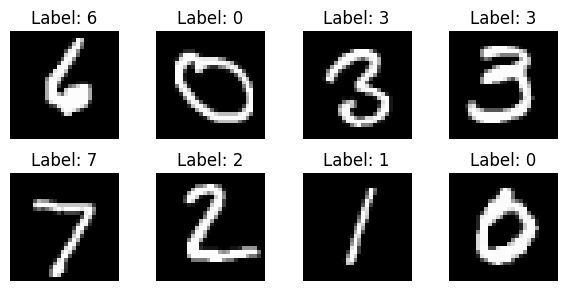

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


batch_train_images, batch_train_targets = next(iter(train_loader))
batch_test_images, batch_test_targets = next(iter(test_loader))
print("Batch train images shape is: ", batch_train_images.shape)
print("Batch test images shape is: ", batch_test_images.shape)
plt.figure(figsize=(6, 3))
for i in range(4):
    plt.subplot(2, 4, i + 1)
    plt.imshow(batch_train_images[i].squeeze().numpy(), cmap="gray")
    plt.axis("off")
    plt.title("Label: %d" % batch_train_targets[i].item())
    plt.subplot(2, 4, i + 5)
    plt.imshow(batch_test_images[i].squeeze().numpy(), cmap="gray")
    plt.axis("off")
    plt.title("Label: %d" % batch_test_targets[i].item())
plt.tight_layout()
plt.show()

<font color='blue'> TODO:</font> Run the previous code snippet multiple times and look at the data.

<font color='blue'> TODO :</font> Use different transforms to pre-process the data. You can use the function [torchvision.transforms.Compose](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Compose) to combine different transforms. You can also use the function [torchvision.transforms.Normalize](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize) to normalize the data. The function takes the mean and standard deviation of the data as input. You can also use the function [torchvision.transforms.RandomHorizontalFlip](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomHorizontalFlip) to flip the data horizontally. You can use the function [torchvision.transforms.RandomRotation](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomRotation) to rotate the data. You can also use the function [torchvision.transforms.RandomResizedCrop](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomResizedCrop) to crop the data. 

Batch train images shape is:  torch.Size([32, 1, 28, 28])
Batch test images shape is:  torch.Size([32, 1, 28, 28])


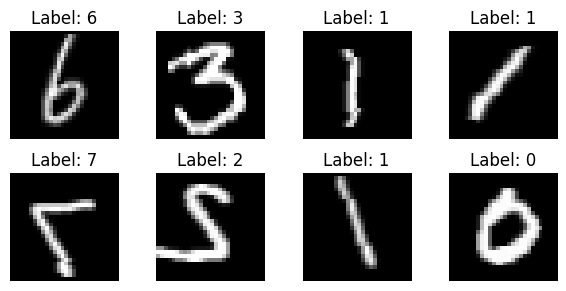

In [32]:
transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(28, scale=(0.8, 1.0), ratio=(0.75, 1.3333)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)


train_dataset = datasets.MNIST(root=".", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root=".", train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
batch_train_images, batch_train_targets = next(iter(train_loader))
batch_test_images, batch_test_targets = next(iter(test_loader))
print("Batch train images shape is: ", batch_train_images.shape)
print("Batch test images shape is: ", batch_test_images.shape)
plt.figure(figsize=(6, 3))
for i in range(4):
    plt.subplot(2, 4, i + 1)
    plt.imshow(batch_train_images[i].squeeze().numpy(), cmap="gray")
    plt.axis("off")
    plt.title("Label: %d" % batch_train_targets[i].item())
    plt.subplot(2, 4, i + 5)
    plt.imshow(batch_test_images[i].squeeze().numpy(), cmap="gray")
    plt.axis("off")
    plt.title("Label: %d" % batch_test_targets[i].item())
plt.tight_layout()
plt.show()

For the rest of the TP, we will use a simple preprocessing composed of the ToTensor() transform with a larger batch size to speed up the training:

In [33]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root=".", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root=".", train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)
batch_train_images, batch_train_targets = next(iter(train_loader))
batch_test_images, batch_test_targets = next(iter(test_loader))

## 3. Neural Network

In this section, we will introduce the neural network. We will start by defining the neural network architecture and then we will implement the forward pass. The neural network is composed of layers and activation functions. The layers are used to transform the input data and the activation functions are used to introduce non-linearity in the model. The neural network is used to approximate a function that maps the input data to the output data. The neural network in Pytorch are defined as classes that inherit from the class [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module). The neural network is composed of layers that are defined in the initialization and the forward pass is defined in the method forward.

For instance, we can define a linear model with one layer as follows:

```python
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = torch.nn.Linear(784, 10) 

    def forward(self, x):
        ### Define the forward pass
        x = x.view(-1, 784) # Flatten the input tensor
        x = self.layer1(x) # Apply the first linear layer
        return x
```

<font color='blue'> TODO:</font> Define a neural network with two hidden layers. The first hidden layer is composed of 128 neurons and the second hidden layer is composed of 64 neurons. The input layer is composed of 28x28 neurons and the output layer is composed of 10 neurons. The activation function is the ReLU function. You can use the function [torch.nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) to define the ReLU function. You can also use the function [torch.nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) to define a linear layer. The linear layer takes as input the number of input neurons and the number of output neurons. 

In [34]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = torch.nn.Linear(784, 128)
        self.layer2 = torch.nn.Linear(128, 10)
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x


model = MyModel()

<font color='blue'> TODO:</font> Verify that your model is correctly defined by printing the model. Compute the output of the model of the first mini-batch of the training dataset.

In [35]:
print(model)
output = model(batch_train_images)
print("Output shape is: ", output.shape)

MyModel(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=10, bias=True)
  (activation): ReLU()
)
Output shape is:  torch.Size([256, 10])


<font color='blue'> TODO:</font> Print the output of the model for the first few samples of the mini-batch. Use the method [.argmax()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.argmax) to get the index of the maximum value. You can also use the method [.max()](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.max) to get the maximum value and the index of the maximum value. Compare the output of the model with the target of the mini-batch. 

In [36]:
print("Output values are: ", output[0].detach().numpy())
print("Predicted classes are: ", output.argmax(dim=1).detach().numpy())
print("True classes are: ", batch_train_targets.numpy())
print(
    "Accuracy is: ", (output.argmax(dim=1) == batch_train_targets).float().mean().item()
)

Output values are:  [-0.05503702  0.13308436  0.02519923  0.0522191   0.08268772  0.12939128
  0.08658399 -0.06775204 -0.08889513  0.02112376]
Predicted classes are:  [1 5 1 5 1 6 1 5 6 1 6 5 1 5 1 5 1 5 1 6 5 4 1 1 5 5 6 5 4 2 1 4 5 6 1 6 5
 1 1 6 6 1 5 6 6 5 5 2 5 6 6 9 5 5 1 6 6 1 1 1 6 6 1 6 2 2 6 1 5 1 2 4 5 1
 4 2 6 1 2 4 5 1 6 1 6 1 1 6 1 5 6 1 1 6 1 6 6 1 2 1 6 5 6 5 1 1 1 6 5 5 6
 6 1 9 4 6 6 1 3 2 9 4 6 6 6 1 4 1 5 9 5 6 2 1 1 6 4 5 5 4 5 5 5 1 1 9 1 1
 6 6 6 5 6 6 4 1 1 4 4 1 1 6 2 1 1 4 1 5 5 6 1 6 9 1 6 1 5 5 1 1 6 9 4 5 6
 1 4 1 1 1 1 3 6 5 6 5 5 6 2 1 5 1 1 5 5 2 1 5 6 1 6 1 2 1 5 6 5 5 1 5 5 1
 2 3 6 4 6 1 1 5 1 4 6 1 1 6 6 5 5 5 9 1 1 5 4 5 5 1 4 6 6 5 4 1 1 4]
True classes are:  [1 2 2 6 7 9 8 0 3 2 3 6 3 7 0 2 9 5 0 7 7 0 5 2 0 0 4 7 0 1 9 3 0 9 7 7 8
 9 9 9 4 5 2 9 1 5 4 9 0 8 9 9 2 3 7 4 6 2 1 5 4 7 3 1 4 4 4 8 1 1 9 4 3 8
 3 8 8 2 9 1 5 2 3 5 9 7 1 6 0 2 9 2 3 0 9 5 6 5 4 4 4 9 8 0 4 2 2 6 6 0 2
 9 1 9 3 8 1 7 9 7 4 6 7 1 1 2 0 7 0 6 6 7 5 4 1 1 0 5 0 6 6 2 5 7 2 

Since the model is not trained yet, it is normal that the output of the model is not correct. The accuracy of the model should be around 10%. 

<font color='blue'> TODO:</font> Compute the numbers of parameters to learn in the model. You can use the function [torch.nn.Module.parameters](https://pytorch.org/docs/stable/generated/torch.nn.Module.parameters.html#torch.nn.Module.parameters) to get the parameters of the model. You can also use the function [torch.nn.Module.named_parameters](https://pytorch.org/docs/stable/generated/torch.nn.Module.named_parameters.html#torch.nn.Module.named_parameters) to get the name of the parameters.

In [37]:
for name, param in model.named_parameters():
    print(name, np.prod(param.shape))
print(
    "Number of parameters is: ",
    sum([np.prod(param.shape) for param in model.parameters()]),
)

layer1.weight 100352
layer1.bias 128
layer2.weight 1280
layer2.bias 10
Number of parameters is:  101770


## 4. Training

In this section, we will see how can train a Neural Network using the Stochastic Gradient Descent (SGD) algorithm. We will start by defining the loss function and then we will implement the backward pass. The loss function is used to measure the error of the model and the backward pass is used to compute the gradients of the model. The gradients are used to update the parameters of the model. The training is composed of multiple epochs and at each epoch, we iterate over the mini-batches of the training dataset. We compute the output of the model, the loss, and the gradients. We then update the parameters of the model using the gradients.

<font color='blue'> TODO:</font> Define the loss function. You can use the function [torch.nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) to define the Cross Entropy Loss if you model has no Softmax output activation layer. Otherwise, you can use the function [torch.nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) to define the Negative Log Likelihood Loss.

In [38]:
criterion = torch.nn.CrossEntropyLoss()

To perform the gradient step we need to define an optimizer. The optimizer is used to update the parameters of the model. The optimizer takes as input the parameters of the model and the learning rate. The learning rate is a hyperparameter that controls the step size of the gradient descent. Each optimizer has a different update rule. The most common optimizer is the Stochastic Gradient Descent (SGD) optimizer. 

Here, we chose to use SGD with a learning rate of 0.01. You can also use the function [torch.optim.Adam](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam) to define the Adam optimizer. The Adam optimizer is an adaptive learning rate optimizer that is commonly used in practice.

In [39]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

<font color='blue'> TODO:</font> Print the gradients of the model. You can use the method [.grad](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.grad) of the parameters of the model and the method [model.parameters()](https://pytorch.org/docs/stable/generated/torch.nn.Module.parameters.html#torch.nn.Module.parameters) to get the parameters of the model.


In [40]:
for parameter in model.parameters():
    print(parameter.grad)

None
None
None
None


The backpropagation has not been performed yet and therefore the gradients are not computed. To compute the gradients, we need to perform the backward pass. And to perform the backward pass, we need to compute the loss. The loss is computed using the output of the model and the target. The target is the true label of the data. We will do one iteration of the training loop to compute the loss and the gradients:

In [41]:
optimizer.zero_grad()  # Reset gradients
images, labels = next(iter(train_loader))  # Load a batch
output = model(images)  # Forward pass
loss = criterion(output, labels)  # Compute loss
loss.backward()  # Backward pass

<font color='blue'> TODO:</font> Compute again the gradients of the model. To so do only print the mean of the gradients for each layer. 

In [42]:
for parameter in model.parameters():
    print(parameter.grad.mean().item())

6.30826034466736e-05
0.00033639027969911695
-3.79259297578205e-11
0.0


<font color='blue'> TODO:</font> Print the bias of the second layer of the model. You can use the method [.bias](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear.bias) of the layer.


In [43]:
model.layer2.bias

Parameter containing:
tensor([-0.0827,  0.0645,  0.0647, -0.0342,  0.0615,  0.0528,  0.0465, -0.0450,
        -0.0857, -0.0092], requires_grad=True)

Now that the gradient for every weight has been calculated, we can update the weights of the model:

In [44]:
optimizer.step()

<font color='blue'> TODO:</font> Print again the bias of the second layer of the model and observe the difference.

In [45]:
model.layer2.bias

Parameter containing:
tensor([-0.0821,  0.0644,  0.0645, -0.0343,  0.0615,  0.0527,  0.0466, -0.0447,
        -0.0859, -0.0093], requires_grad=True)

The model's weight has been updated. We can now train the model for multiple epochs. We will iterate over the mini-batches of the training dataset and update the parameters of the model.

<font color='blue'> TODO:</font> Write a function to train the model for any numbers of epochs. At each epoch, iterate over the mini-batches of the training dataset and update the parameters of the model. Print the loss average on the dataset after each epoch. Run your function for 3 epochs.

In [46]:
def training_function(n_epoch, model, train_loader, criterion, optimizer):
    for epoch in range(n_epoch):
        loss_average = 0
        n_samples = 0
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            loss_average += loss.item() * len(images)
            n_samples += len(images)
            if i % 100 == 0:
                print("Epoch %d - Iteration %d - Loss: %.4f" % (epoch, i, loss.item()))
        print("\t Epoch %d - Loss: %.4f" % (epoch, loss_average / len(train_dataset)))


model = MyModel()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
training_function(5, model, train_loader, criterion, optimizer)

Epoch 0 - Iteration 0 - Loss: 2.3057
Epoch 0 - Iteration 100 - Loss: 2.1280
Epoch 0 - Iteration 200 - Loss: 1.8249
	 Epoch 0 - Loss: 2.0446
Epoch 1 - Iteration 0 - Loss: 1.7145
Epoch 1 - Iteration 100 - Loss: 1.4308
Epoch 1 - Iteration 200 - Loss: 1.1174
	 Epoch 1 - Loss: 1.3422
Epoch 2 - Iteration 0 - Loss: 1.0671
Epoch 2 - Iteration 100 - Loss: 0.8809
Epoch 2 - Iteration 200 - Loss: 0.8079
	 Epoch 2 - Loss: 0.8740
Epoch 3 - Iteration 0 - Loss: 0.7694
Epoch 3 - Iteration 100 - Loss: 0.6259
Epoch 3 - Iteration 200 - Loss: 0.5790
	 Epoch 3 - Loss: 0.6705
Epoch 4 - Iteration 0 - Loss: 0.6171
Epoch 4 - Iteration 100 - Loss: 0.6944
Epoch 4 - Iteration 200 - Loss: 0.5203
	 Epoch 4 - Loss: 0.5679


We can observe the data, the target, and the output of the model for a few samples:

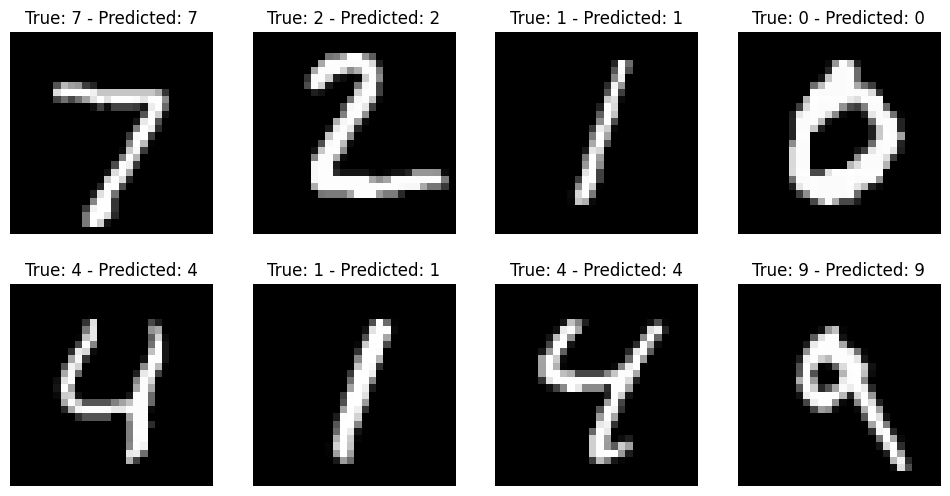

In [47]:
plt.figure(figsize=(12, 6))
for i, (images, labels) in enumerate(
    zip(batch_test_images[:8], batch_test_targets[:8])
):
    output = model(images)
    plt.subplot(2, 4, i + 1)
    plt.imshow(images.squeeze().numpy(), cmap="gray")
    plt.axis("off")
    plt.title("True: %d - Predicted: %d" % (labels, output.argmax().item()))

## 5. Evaluating the model

While training the model is crucial to learn the parameters of the model, evaluating the model is important to assess the performance of the model. We will evaluate the model on the testing dataset. We will compute the accuracy of the model and the confusion matrix. The accuracy is the number of correct predictions divided by the total number of predictions. The confusion matrix is a matrix that shows the number of correct and incorrect predictions for each class.

<font color='blue'> TODO:</font> Write a funtion to evaluate the model. Compute the accuracy of the model on the testing dataset. You can use the function [torch.argmax](https://pytorch.org/docs/stable/generated/torch.argmax.html#torch.argmax) to get the index of the maximum value. You can also use the function [torch.eq](https://pytorch.org/docs/stable/generated/torch.eq.html#torch.eq) to compare the output of the model with the target. You can also use the function [torch.sum](https://pytorch.org/docs/stable/generated/torch.sum.html#torch.sum) to sum the number of correct predictions. To do so, you will have to loop over the mini-batches of the testing dataset.

In [48]:
def testing_function(model, test_loader):
    n_correct = 0
    n_total = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        n_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
        n_total += len(targets)
    print("Accuracy: %.2f" % (n_correct / n_total))


testing_function(model, test_loader)

Accuracy: 0.88


<font color='blue'> TODO:</font> Run your training function for one extra epoch then evaluate the model. Compare the accuracy of the model before and after training.

In [49]:
training_function(1, model, train_loader, criterion, optimizer)
testing_function(model, test_loader)

Epoch 0 - Iteration 0 - Loss: 0.5741
Epoch 0 - Iteration 100 - Loss: 0.4408
Epoch 0 - Iteration 200 - Loss: 0.5204
	 Epoch 0 - Loss: 0.5069
Accuracy: 0.88


<font color='blue'> TODO:</font> Write a function that computes and return the confusion matrix of the model. You can use Scikit-learn to compute the confusion matrix. You can use the function [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to compute the confusion matrix. 

Accuracy: 0.88
Confusion matrix:


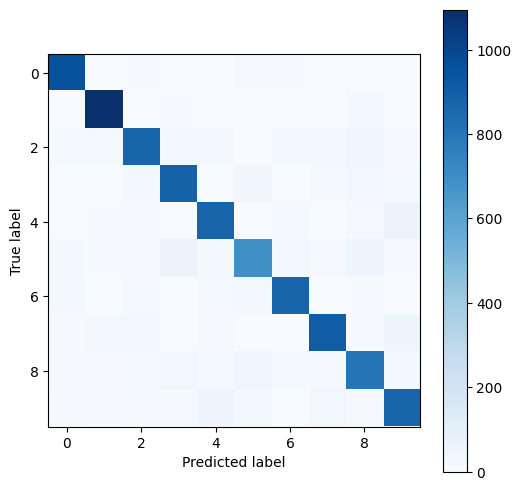

In [50]:
import sklearn.metrics


def testing_function(model, test_loader):
    n_correct = 0
    n_total = 0
    all_predictions = []
    all_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1)
        n_correct += torch.sum(predictions == targets).item()
        n_total += len(targets)
        all_predictions.extend(predictions.numpy())
        all_targets.extend(targets.numpy())
    print("Accuracy: %.2f" % (n_correct / n_total))
    print("Confusion matrix:")
    confusion_matrix = sklearn.metrics.confusion_matrix(all_targets, all_predictions)
    return confusion_matrix


confusion_matrix = testing_function(model, test_loader)
plt.figure(figsize=(6, 6))
plt.imshow(confusion_matrix, cmap="Blues")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()